# AI Tinkerer Demo: LLM-based Knowledge Graph Generation

## 1. Load API Key with .env

In [26]:
import dotenv

# Requires OPENAI_API_KEY and ANTHROPIC_API_KEY to be in your .env file
dotenv.load_dotenv()

True

## 2. Set up your prompt for structured data

In [27]:
messages = [
    {"role": "system", "content": """You are a helpful assistant designed to output knowledge graph triples in JSON format like so:
            {
              "nodes": [
                {"id": "Andrew Chang", "type": "Person"},
              ],
              "relationships": [
                {"source": "Andrew Chang", "target": "American Data Science", "type": "CEO"},
              ]
            }
    """},
    {"role": "user", "content": "Who are all the individuals affiliated with OpenAI and their relationships?"},
]

## 3. Create initial node and edges with OpenAI's GPT-4o

In [28]:
import json
from openai import OpenAI

client = OpenAI()

response = client.chat.completions.create(
    model="gpt-4.1",
    response_format={ "type": "json_object" },
    messages=messages,
    seed=123,
)
print(response.choices[0].message.content)

{
  "nodes": [
    {"id": "OpenAI", "type": "Organization"},
    {"id": "Sam Altman", "type": "Person"},
    {"id": "Greg Brockman", "type": "Person"},
    {"id": "Ilya Sutskever", "type": "Person"},
    {"id": "Wojciech Zaremba", "type": "Person"},
    {"id": "John Schulman", "type": "Person"},
    {"id": "Elon Musk", "type": "Person"},
    {"id": "Reid Hoffman", "type": "Person"},
    {"id": "Peter Thiel", "type": "Person"},
    {"id": "Jessica Livingston", "type": "Person"},
    {"id": "Adam D’Angelo", "type": "Person"},
    {"id": "Tasha McCauley", "type": "Person"},
    {"id": "Sam Altman", "type": "Person"}
  ],
  "relationships": [
    {"source": "Sam Altman", "target": "OpenAI", "type": "Co-founder"},
    {"source": "Sam Altman", "target": "OpenAI", "type": "CEO"},
    {"source": "Greg Brockman", "target": "OpenAI", "type": "Co-founder"},
    {"source": "Greg Brockman", "target": "OpenAI", "type": "President"},
    {"source": "Ilya Sutskever", "target": "OpenAI", "type": "Co-fo

In [29]:
openai_data = json.loads(response.choices[0].message.content)

## 4. Display GPT-4o generated Graph

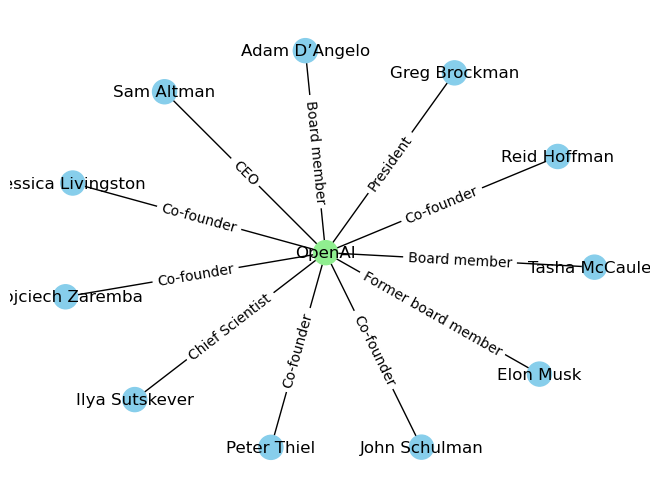

In [30]:
import networkx as nx
import matplotlib.pyplot as plt

def display_graph(G, data):    
    # Add nodes
    for node in data['nodes']:
        G.add_node(node['id'], type=node['type'])
    
    # Add edges
    for relationship in data['relationships']:
        G.add_edge(relationship['source'], relationship['target'], type=relationship['type'])
    
    # Draw the graph
    pos = nx.spring_layout(G, k=0.4)
    node_colors = ['skyblue' if G.nodes[node].get('type', "") == 'Person' else 'lightgreen' for node in G.nodes()]
    nx.draw(G, pos, with_labels=True, node_color=node_colors)
    
    # Add edge labels
    edge_labels = {(relationship['source'], relationship['target']): relationship['type'] for relationship in data['relationships']}
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

    plt.show()

# Create a graph
openai_G = nx.Graph()

display_graph(openai_G, openai_data)

In [31]:
import json
from openai import OpenAI

client = OpenAI()

response = client.chat.completions.create(
    model="gpt-4.1",
    response_format={ "type": "json_object" },
    messages=messages,
    seed=123,
)
print(response.choices[0].message.content)

{
  "nodes": [
    {"id": "Sam Altman", "type": "Person"},
    {"id": "Greg Brockman", "type": "Person"},
    {"id": "Ilya Sutskever", "type": "Person"},
    {"id": "Mira Murati", "type": "Person"},
    {"id": "John Schulman", "type": "Person"},
    {"id": "Wojciech Zaremba", "type": "Person"},
    {"id": "OpenAI", "type": "Organization"}
  ],
  "relationships": [
    {"source": "Sam Altman", "target": "OpenAI", "type": "Co-Founder"},
    {"source": "Greg Brockman", "target": "OpenAI", "type": "Co-Founder"},
    {"source": "Ilya Sutskever", "target": "OpenAI", "type": "Co-Founder"},
    {"source": "Mira Murati", "target": "OpenAI", "type": "CTO"},
    {"source": "John Schulman", "target": "OpenAI", "type": "Co-Founder"},
    {"source": "Wojciech Zaremba", "target": "OpenAI", "type": "Co-Founder"}
  ]
}


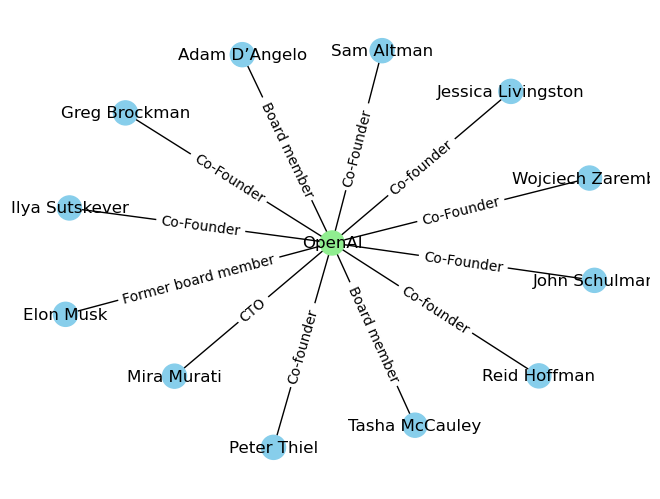

In [32]:
data = json.loads(response.choices[0].message.content)

# append additional data to nodes and relationships data
openai_data["nodes"] += data["nodes"]
openai_data["relationships"] += data["relationships"]

display_graph(openai_G, openai_data)

## 5. Context-based KG generation to address outdated or nonexistant data (RAGs)

In [39]:
messages = [
    {"role": "system", "content": """You are a helpful assistant designed to output knowledge graph triples in JSON format like so:
            {
              "nodes": [
                {"id": "Andrew Chang", "type": "Person"},
              ],
              "relationships": [
                {"source": "Andrew Chang", "target": "American Data Science", "type": "CEO"},
              ]
            }
    """},
    {"role": "system", "content": """
    Exampl.AI is a cutting-edge technology company specializing in artificial intelligence and machine learning solutions. Founded in 2015, the company has quickly risen to prominence in the tech industry, offering innovative products and services that cater to a wide range of sectors, including healthcare, finance, and retail. The organizational structure of Exampl.AI is designed to foster innovation and agility. At the helm is CEO Jane Doe, a visionary leader with over two decades of experience in AI and technology. Reporting directly to her is CTO John Smith, who oversees the company's technological advancements and R&D initiatives. The company is divided into several key departments: Product Development, led by Emily Johnson; Data Science, headed by Michael Brown; and Sales & Marketing, managed by Sarah Davis. Exampl.AI collaborates with various industry giants such as TechCorp Solutions and InnovateX to deliver state-of-the-art AI solutions. The company's commitment to excellence and its dynamic team of experts make it a formidable player in the AI landscape.
    """},
    {"role": "user", "content": "Who are all the individuals affiliated with this company?"},
]

In [40]:
import json
from openai import OpenAI

client = OpenAI()

response = client.chat.completions.create(
    model="gpt-4.1",
    response_format={ "type": "json_object" },
    messages=messages,
    seed=123,
)
print(response.choices[0].message.content)

{
  "nodes": [
    {"id": "Exampl.AI", "type": "Organization"},
    {"id": "Jane Doe", "type": "Person"},
    {"id": "John Smith", "type": "Person"},
    {"id": "Emily Johnson", "type": "Person"},
    {"id": "Michael Brown", "type": "Person"},
    {"id": "Sarah Davis", "type": "Person"}
  ],
  "relationships": [
    {"source": "Jane Doe", "target": "Exampl.AI", "type": "CEO"},
    {"source": "John Smith", "target": "Exampl.AI", "type": "CTO"},
    {"source": "Emily Johnson", "target": "Exampl.AI", "type": "Head of Product Development"},
    {"source": "Michael Brown", "target": "Exampl.AI", "type": "Head of Data Science"},
    {"source": "Sarah Davis", "target": "Exampl.AI", "type": "Head of Sales & Marketing"}
  ]
}


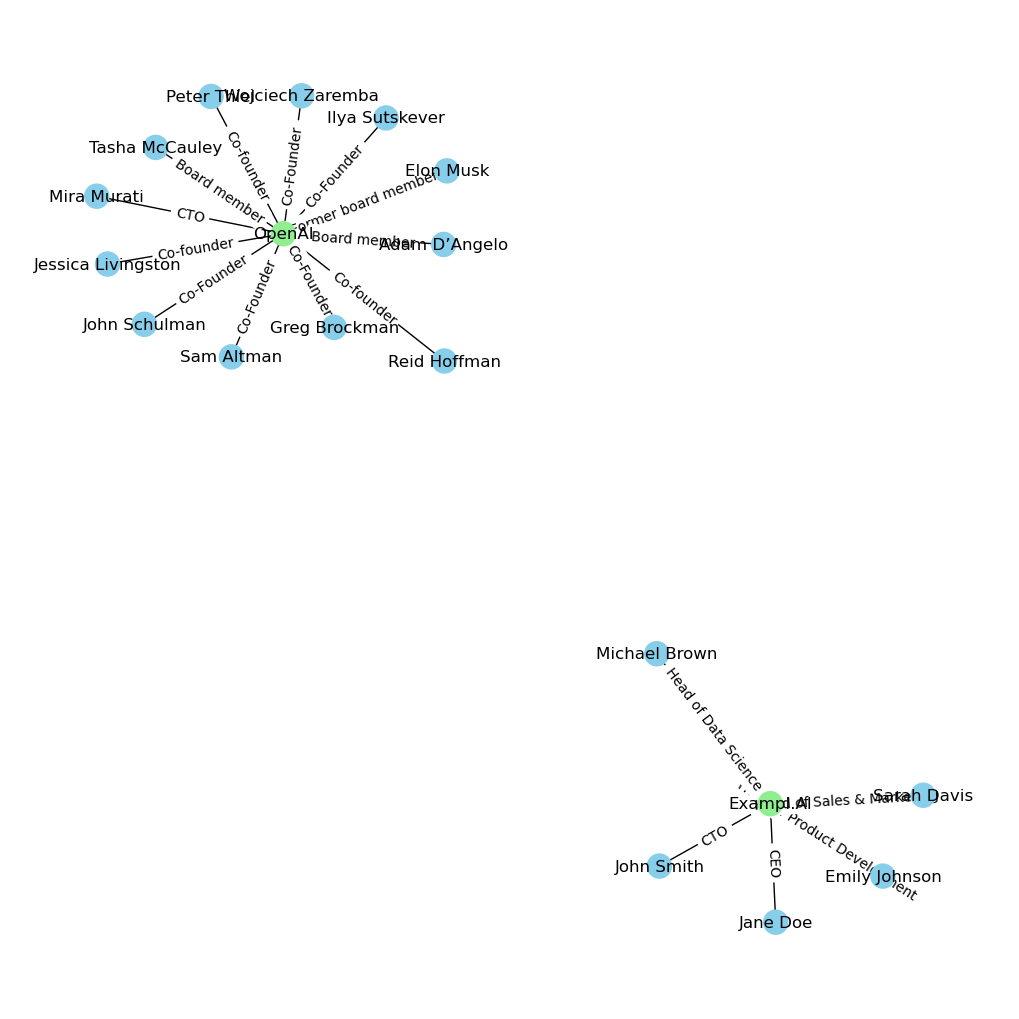

In [41]:
data = json.loads(response.choices[0].message.content)
plt.figure(figsize=(10, 10))

# append additional data to nodes and relationships data
openai_data["nodes"] += data["nodes"]
openai_data["relationships"] += data["relationships"]

display_graph(openai_G, openai_data)